# This is a brief tutorial on open fits spectra using Jupyter Notebooks

## These are Python packages that we will be using that need to be imported

In [85]:
import numpy
from astropy.io import fits
import matplotlib.pyplot as plt

## We can open up a spectra file using the astropy.io.fits module

In [86]:
spec = fits.open('/path/to/spectra/spec-3814-55535-0072.fits')

## There are many objects inside of the fits file, each containing a set of data. The SDSS data model for spectra will tell us what kind of data each object contains.
https://data.sdss.org/datamodel/files/BOSS_SPECTRO_REDUX/RUN2D/spectra/PLATE4/spec.html

In [87]:
print(spec)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fd4cee7cd68>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fd4cf0a1eb8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fd4cf3ea828>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fd4cf452748>]


## Each object contains a "header" and "data". The header gives information about what is inside the data.

## We can look at what the header information for the first object looks like. We can see information about the SDSS plate this spectra was taken from, including the day the spectra was taken (MJD), and the ID number of the plate (PLATEID).

In [88]:
spec[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'SDSS 2.5-M'         / Sloan Digital Sky Survey                       
FLAVOR  = 'science '           / exposure type, SDSS spectro style              
BOSSVER = 'r       '           / ICC version                                    
MJD     =                55535 / APO fMJD day at start of exposure              
MJDLIST = '55535   '           /                                                
NAME    = '3814-55535-01'      / The name of the currently loaded plate         
PLATEID =                 3814 / The currently loaded plate                     
TILEID  =                10179 /Cartridge used in this plugging                 
CARTID  =                   

## Looking at the next object, we find that it contains spectral information such as flux and wavelength.

In [89]:
spec[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 4623 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'flux    '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'loglam  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'ivar    '        

## We can pull out the flux and wavelength

In [90]:
flux = spec[1].data['flux']
wav = spec[1].data['loglam']

## and plot the spectrum.

Text(0.5,0,'Wavelength')

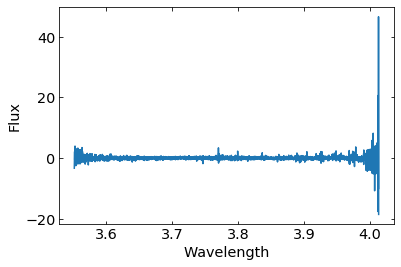

In [91]:
plt.plot(wav, flux)
plt.ylabel('Flux')
plt.xlabel('Wavelength')

## Looking at the data model, we find out that flux is in units (10^-17 ergs/s/cm2/Å) and wavelength is in units log(Å). We can make the spectrum units a little more familiar. Finally, we should account for redshift and put the spectrum into the rest-frame.

In [92]:
redshift = spec[2].data['Z']
flux = np.log10(1e17 * spec[1].data['flux'])
wav = 10**spec[1].data['loglam'] / (1 + redshift)

/home/ray/anaconda3/envs/paper1/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


Text(0.5,0,'Wavelength [Angstrom]')

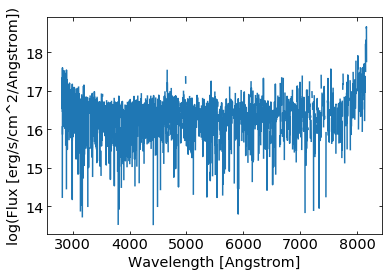

In [93]:
plt.plot(wav, flux)
plt.ylabel('log(Flux [erg/s/cm^2/Angstrom])')
plt.xlabel('Wavelength [Angstrom]')

## Turns out we have a spectrum without anything resolvable in it, how about one with something interesting?

/home/ray/anaconda3/envs/paper1/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10


Text(0.5,0,'Wavelength [Angstrom]')

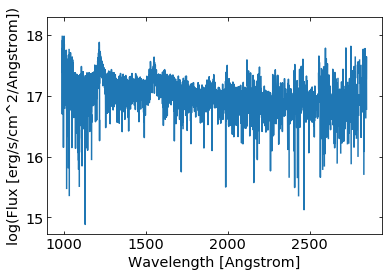

In [94]:
spec = fits.open('spec-7595-56957-0776.fits')

redshift = spec[2].data['Z']
flux = np.log10(1e17 * spec[1].data['flux'])
wav = 10**spec[1].data['loglam'] / (1 + redshift)

plt.plot(wav, flux)
plt.ylabel('log(Flux [erg/s/cm^2/Angstrom])')
plt.xlabel('Wavelength [Angstrom]')